# **Cat vs Dog CNN Classifier**
-----------
---------

### Problem Statement :-
- ####   In this Section we are implementing Convolution Neural Network(CNN) Classifier for Classifying dog and cat images. The Total number of images available for training is 20,000 and final testing is done on seperate 5000 images.

### Note :-  This problem statement and dataset is taken from this **Kaggle** competition.

> Add blockquote




### Loading the dataset From Kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:07<00:00, 183MB/s]
100% 1.06G/1.06G [00:07<00:00, 159MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

### Import required libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


Generator

In [5]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


#### Doing Normalize

In [6]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

### Create CNN Model

In [15]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),padding = 'valid', activation='relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding = 'valid'))

model.add(Conv2D(32, kernel_size=(3, 3),padding = 'valid', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding = 'valid'))

model.add(Conv2D(32, kernel_size=(3, 3),padding = 'valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,714,625 (14.17 MB)

 Trainable params: 3,714,433 (14.17 MB)

 Non-trainable params: 192 (768.00 B)

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_dataset,epochs = 10,validation_data = validation_dataset)
history

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 67ms/step - accuracy: 0.5891 - loss: 1.0111 - val_accuracy: 0.7044 - val_loss: 0.5732
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.7154 - loss: 0.5562 - val_accuracy: 0.7238 - val_loss: 0.5467
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 81ms/step - accuracy: 0.7836 - loss: 0.4614 - val_accuracy: 0.7632 - val_loss: 0.5120
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 66ms/step - accuracy: 0.8220 - loss: 0.3928 - val_accuracy: 0.7602 - val_loss: 0.5153
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 73ms/step - accuracy: 0.8577 - loss: 0.3254 - val_accuracy: 0.7884 - val_loss: 0.5345
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 66ms/step - accuracy: 0.9036 - loss: 0.2349 - val_accuracy: 0.7450 - val_loss: 1.0913
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9400 - loss: 0.1553 - val_accuracy: 0.7466 - val_loss: 1.1706
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9609 - loss: 0.1043 - 

#### Plot the model with training Vs validation Accuracy

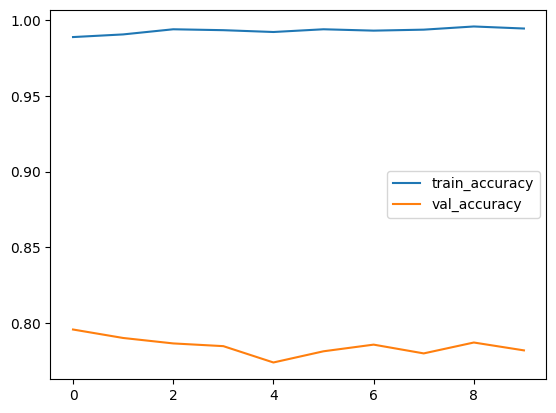

In [13]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

#### I thing we are getting overfitting , so  I have to try for reduce overfitting
- use batch_normalization & dropout




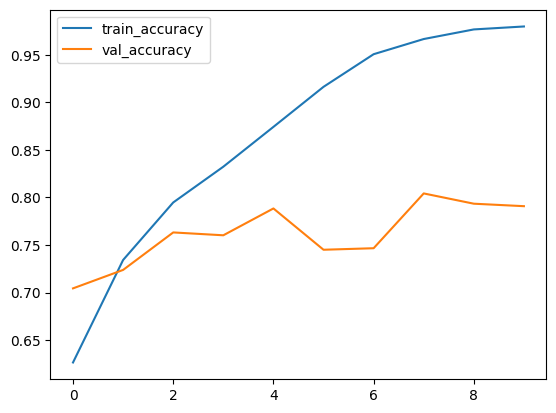

In [19]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

### plot the loss between train & validation

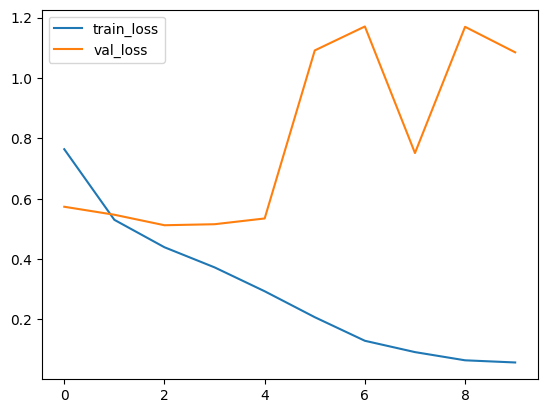

In [24]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

##Predict the model & Visualize

In [26]:
import cv2

In [37]:
test_img = cv2.imread('/content/train/dogs/dog.10.jpg')

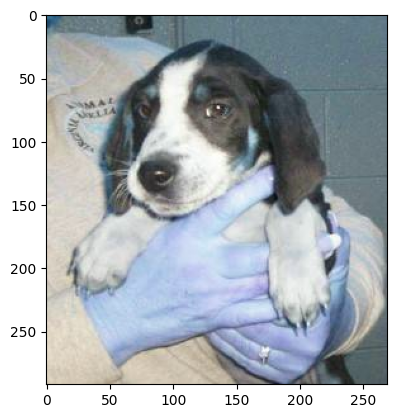

In [38]:
plt.imshow(test_img)

In [39]:
test_img.shape

(292, 269, 3)

### Check the image that is it dog or cat
- 0 means = cat
- 1 means = dog

In [40]:
test_img = cv2.resize(test_img,(256,256))

In [41]:
test_input = test_img.reshape((1,256,256,3))

In [42]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.]], dtype=float32)

### model is working well on train data which is giving best prediction

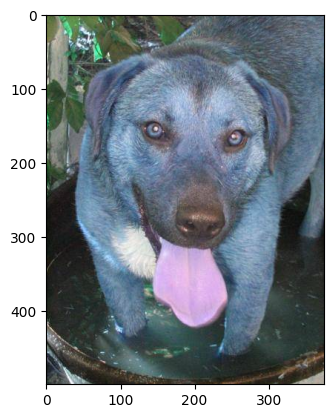

In [48]:
# lets check on test dataset

test_image = cv2.imread('/content/test/dogs/dog.10075.jpg')
plt.imshow(test_image)

In [49]:
test_image = cv2.resize(test_image,(256,256))
test_input = test_image.reshape((1,256,256,3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.]], dtype=float32)

#### model is also working best on test data which is giving best prediction

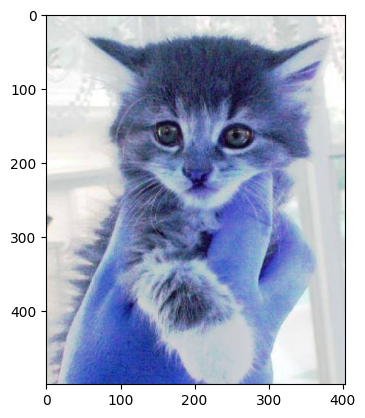

In [59]:
# Again lets check on train dataset

test_img = cv2.imread('/content/dogs_vs_cats/train/cats/cat.100.jpg')
plt.imshow(test_img)

In [60]:
test_image = cv2.resize(test_img,(256,256))
test_input = test_image.reshape((1,256,256,3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.]], dtype=float32)